In [33]:
gu_name = ['강남구','강동구','강서구','강북구','관악구','광진구','구로구','금천구',
          '노원구','동대문구','도봉구','동작구','마포구','서대문구','성동구','성북구',
          '서초구','송파구','영등포구','용산구','양천구','은평구','종로구','중구','중랑구']

many = len(gu_name)

In [34]:
# 구 별로 dataframe 불러오기
def get_dataframe(name):
    return pd.read_csv(f'../seoul_apt_trade_data/monthly_trade/{name}_trade.csv', encoding = 'cp949')

# 주 단위로 data저장
def save_dataframe(df, name, week):
    df.to_csv(f'../seoul_apt_trade_data/weekly_trade/{name}_{week}week_trade.csv', encoding = 'cp949')

In [35]:
import pandas as pd
import datetime

gu_data = [get_dataframe(name) for name in gu_name]
price_data = []

start_date = datetime.date(2006,1,1)
#weeks = int(datetime.date(2021,1,31) - start_date)//7
for i in range(many):
    gu_data[i]['면적당가격'] = gu_data[i]['거래금액']/gu_data[i]['전용면적']
    gu_data[i]['거래주'] = [(datetime.date((int)(date[:4]),(int)(date[5:7]),(int)(date[8:10]))-start_date).days//7 for date in gu_data[i]['거래일']]
    gu_data[i]['count'] = 1
    price_data.append(gu_data[i].loc[:,['거래주','면적당가격','count']].groupby('거래주').sum())
    price_data[i]['면적당가격'] = price_data[i]['면적당가격']/price_data[i]['count']

In [36]:
#save trade data weekly
for i in range(many):
    for week in range(788):
        df = gu_data[i][gu_data[i]['거래주'] == week]
        save_dataframe(df, gu_name[i], week)

강남구 0


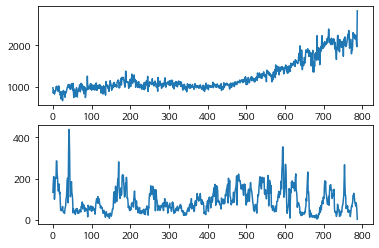

강동구 1


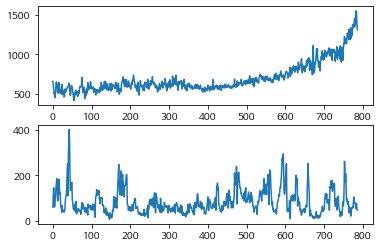

강서구 2


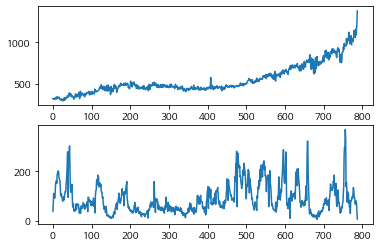

강북구 3


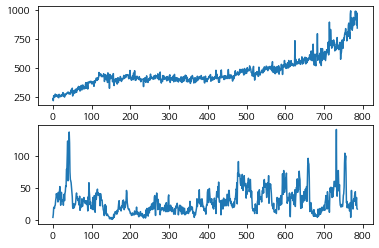

관악구 4


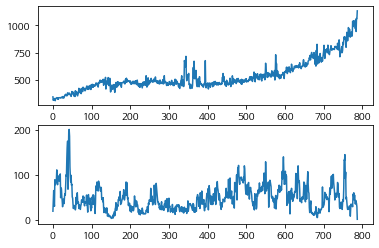

광진구 5


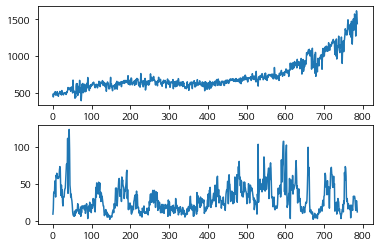

구로구 6


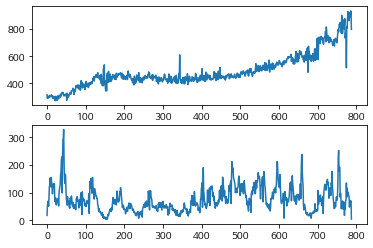

금천구 7


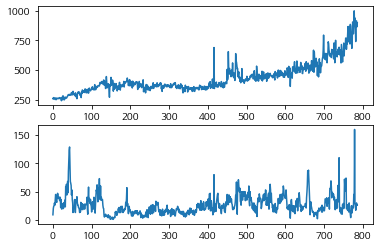

노원구 8


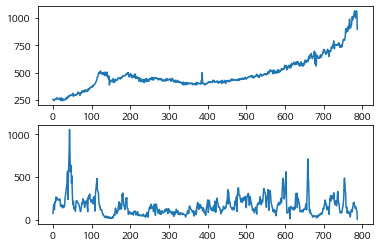

동대문구 9


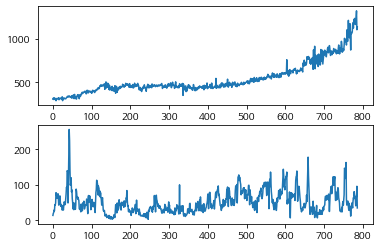

도봉구 10


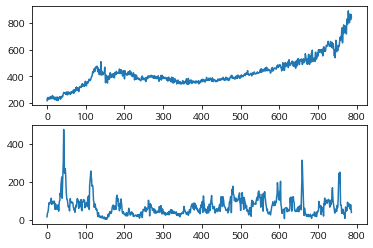

동작구 11


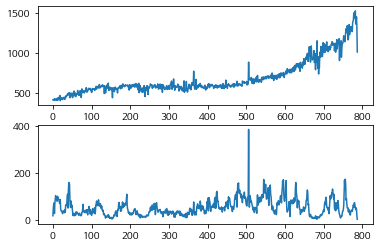

마포구 12


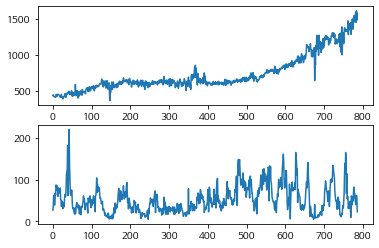

서대문구 13


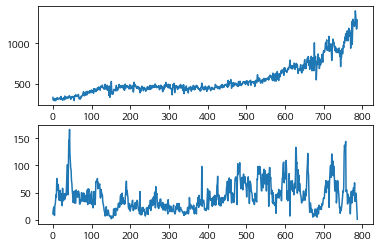

성동구 14


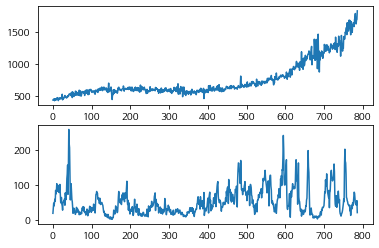

성북구 15


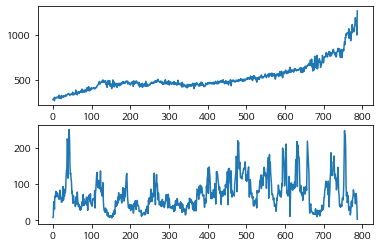

서초구 16


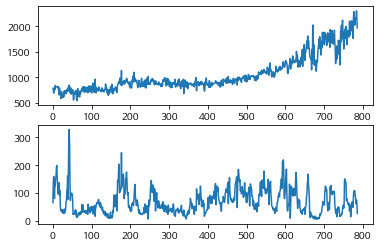

송파구 17


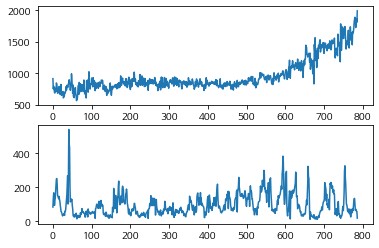

영등포구 18


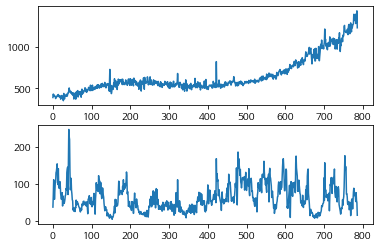

용산구 19


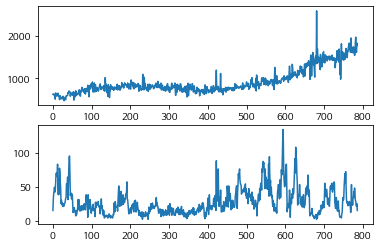

양천구 20


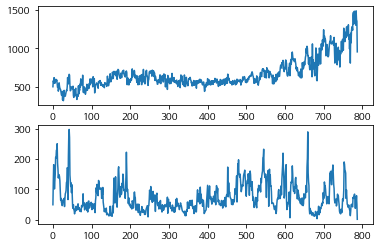

은평구 21


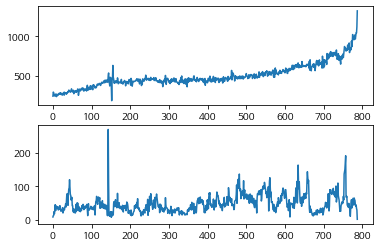

종로구 22


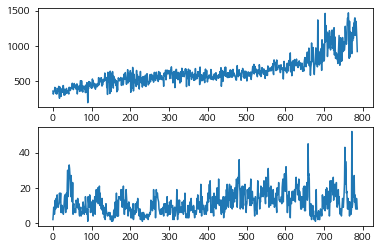

중구 23


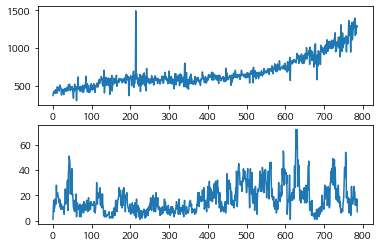

중랑구 24


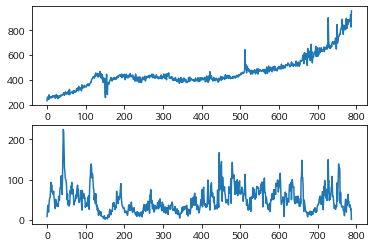

In [37]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm

mpl.rcParams['axes.unicode_minus'] = False

path = 'C:\\Windows\\Fonts\\Hancom Gothic Regular.ttf'
font_name = fm.FontProperties(fname=path, size=50).get_name()
plt.rc('font', family=font_name)

for i in range(25):
    print(gu_name[i],i)
    plt.subplot(211)
    plt.plot(price_data[i]['면적당가격'])
    plt.subplot(212)
    plt.plot(price_data[i]['count'])
    plt.show()